In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [12]:
cf = pd.read_csv("insurance (2).csv")
cf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
cf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
cf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
cf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


 Data looks legit as all the statistics seem reasonable
- Looking at the age column, data looks representative of the true age distribution of the adult population
- Very few people have more than 2 children. 75% of the people have 2 or less children
- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

In [18]:
cf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
cf.isna().apply(pd.value_counts)   #null value check

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [17]:
pd.crosstab(cf["smoker"],cf["sex"])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [20]:
corr=cf.corr() 
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


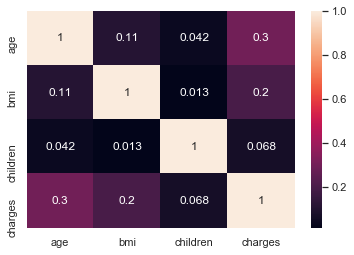

In [21]:
sns.heatmap(corr,annot=True)

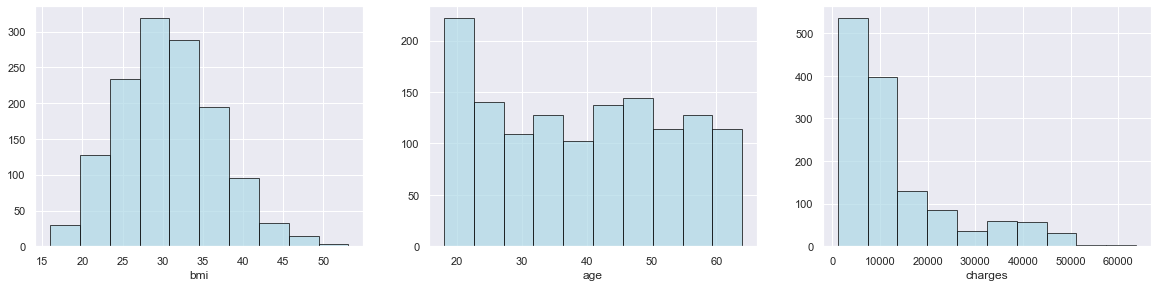

In [76]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(cf.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(cf.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(cf.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

- bmi looks quiet normally distributed
- Age seems be be distributed quiet uniformly
- As seen in the previous step, charges are highly skewed

In [24]:
pd.pivot_table(cf,"charges", index=["smoker","sex"], columns= ["region"])

region            northeast     northwest     southeast     southwest
smoker sex                                                           
no     female   9640.426984   8786.998679   8440.205552   8234.091260
       male     8664.042222   8320.689321   7609.003587   7778.905534
yes    female  28032.046398  29670.824946  33034.820716  31687.988430
       male    30926.252583  30713.181419  36029.839367  32598.862854

In [77]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(cf.bmi),stats.skew(cf.age),stats.skew(cf.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


bmi has a few extreme values
charges as it is highly skewed, there are quiet a lot of extreme values

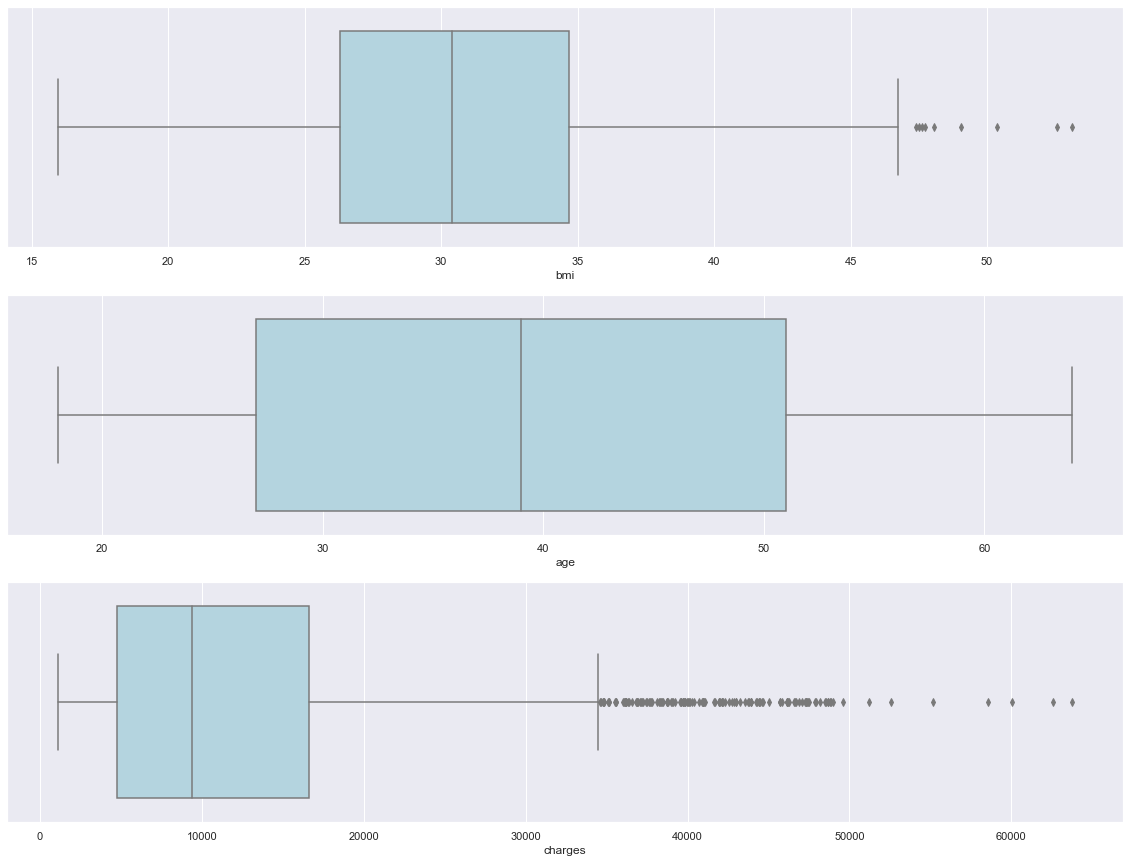

In [78]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= cf.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= cf.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= cf.charges, color='lightblue')

plt.show()

- bmi has a few extreme values
- charges as it is highly skewed, there are quiet a lot of extreme values

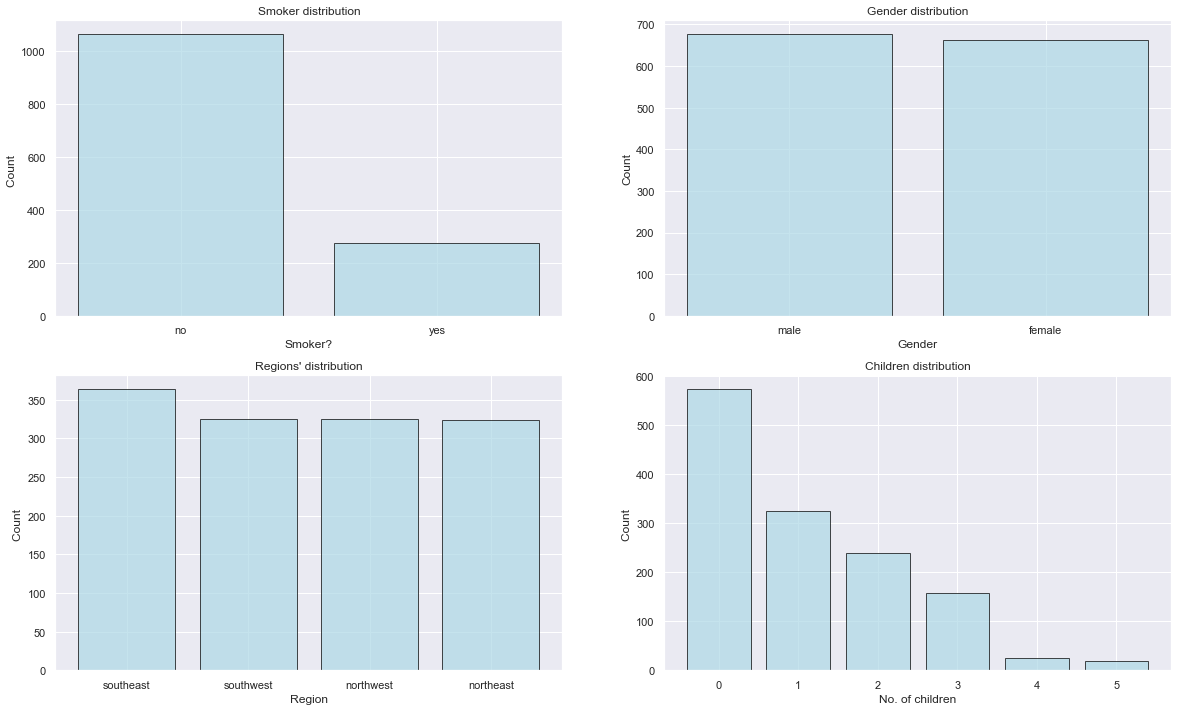

In [79]:
plt.figure(figsize=(20,25))


x = cf.smoker.value_counts().index    #Values for x-axis
y = [cf['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = cf.sex.value_counts().index    #Values for x-axis
y1 = [cf['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = cf.region.value_counts().index    #Values for x-axis
y2 = [cf['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = cf.children.value_counts().index    #Values for x-axis
y3 = [cf['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

- There are a lot more non-smokers than there are smokers in the data
- Instances are distributed evenly accross all regions
- Gender is also distributed evenly
- Most instances have less than 2 children and very few have 4 or 5 children
Bi-variate distribution of every possible attribute pair

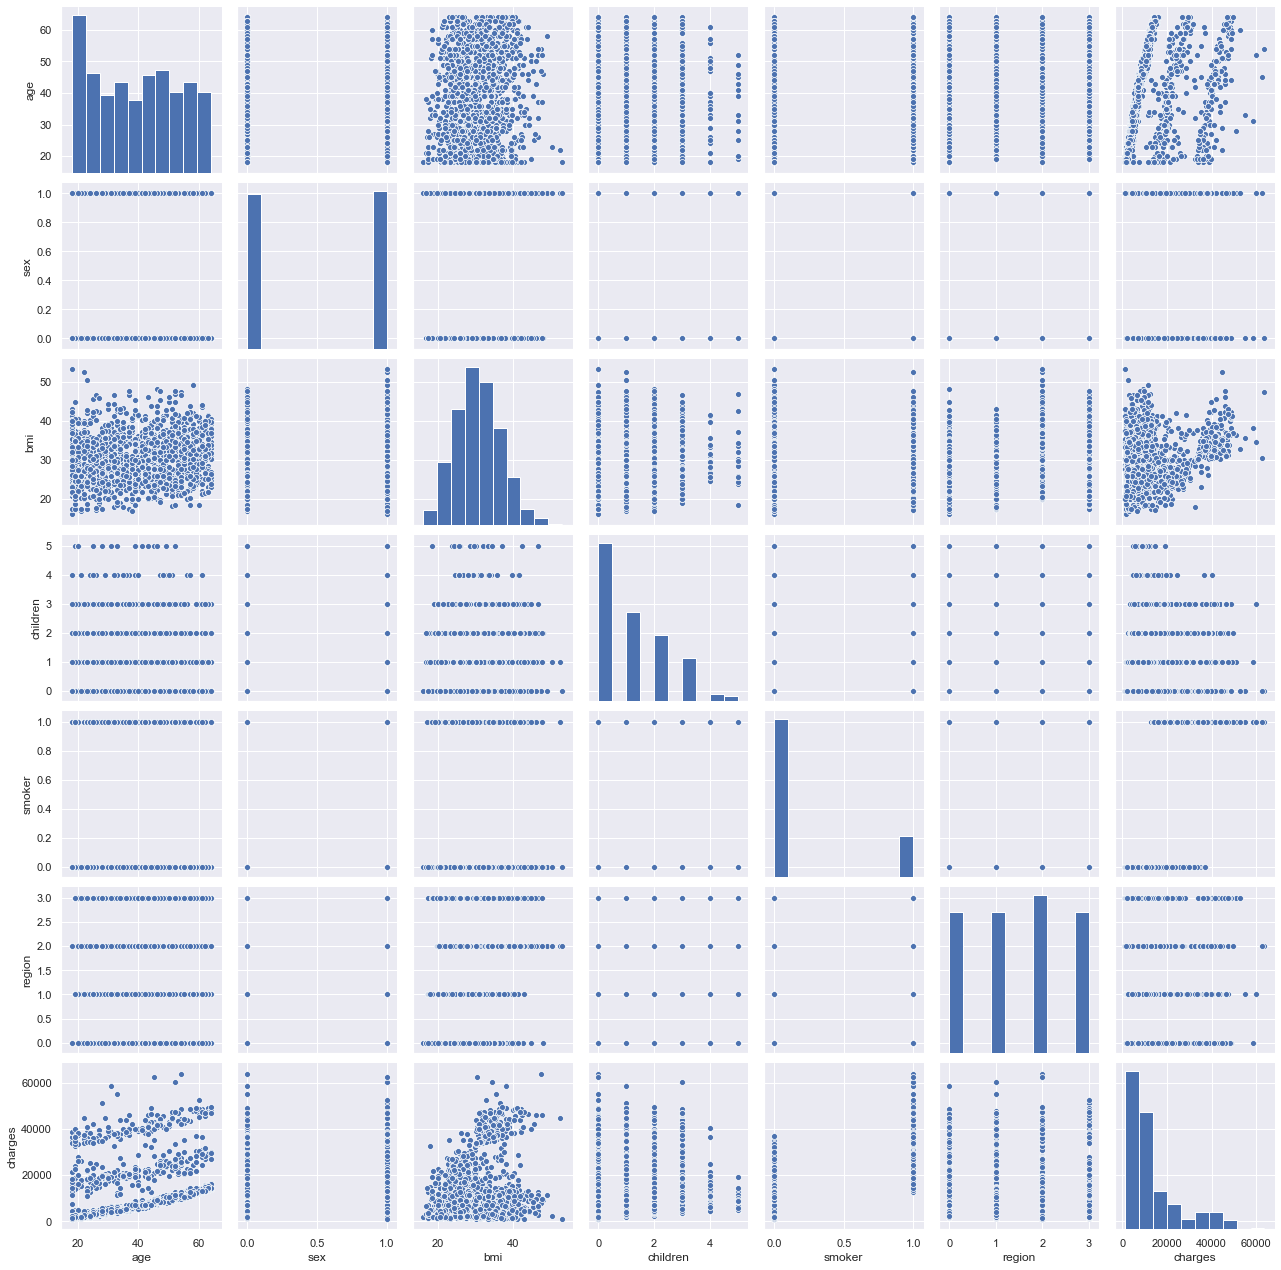

In [85]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
cf_encoded = copy.deepcopy(cf)
cf_encoded.loc[:,['sex', 'smoker', 'region']] = cf_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(cf_encoded)  #pairplot
plt.show()

- The only obvious correlation of 'charges' is with 'smoker'
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

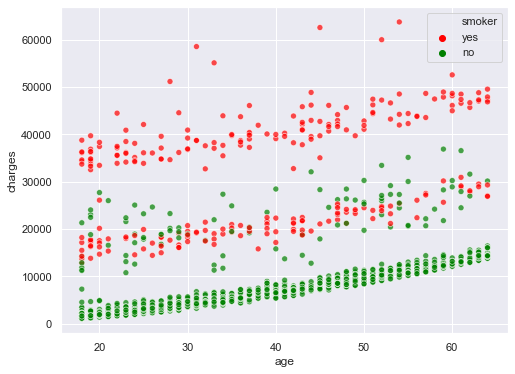

In [28]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges across

plt.figure(figsize=(8,6))
sns.scatterplot(cf.age, cf.charges, hue=cf.smoker, palette=["red","green"], alpha=0.7)
plt.show()

- Visually the difference between charges of smoker and charges of non-smokers is apparent

In [35]:
# T-test to check dependency of smoking on charges
Ho= "Charges of smoker and non-smoker are the same" #Stating the Null Hypothesis
Ha= "Charges of smoker and non-smoker are not the same" #Stating the Alternate Hypothesis

x= np.array(cf[cf.smoker =="yes"].charges) #Selecting charges corresponding to smokers as an array
y= np.array(cf[cf.smoker =="no"].charges) #Selecting charges corresponding to non-smokers as an array

t, p_value = stats.ttest_ind(x,y, axis =0) #performing the independent t-test

if p_value <0.05: #setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [36]:
# T-test to check dependency of bmi on sex
Ho= "BMI of males and females are the same" #Stating the Null Hypothesis
Ha= "BMI of males and females are not the same" #Stating the Alternate Hypothesis

x= np.array(cf[cf.sex =="male"].bmi) #Selecting bmi of male as an array
y= np.array(cf[cf.sex =="female"].bmi) #Selecting bmi of female as an array

t, p_value = stats.ttest_ind(x,y, axis =0) #performing the independent t-test

if p_value <0.05: #setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

BMI of males and females are the same as the p_value (0.08997637178984932) > 0.05


Gender has no effect on bmi

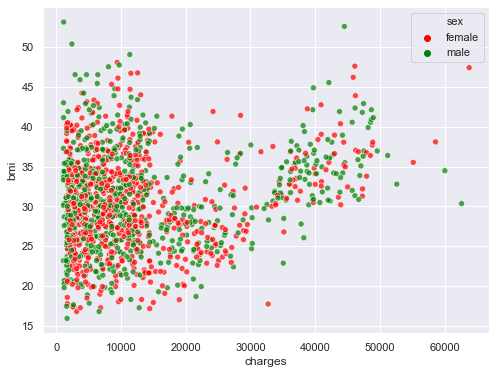

In [41]:
#Scatter plot to look for visual evidence of dependency between bmi & sex

plt.figure(figsize=(8,6))
sns.scatterplot(cf.charges, cf.bmi, hue=cf.sex, palette=["red","green"], alpha=0.7)
plt.show()

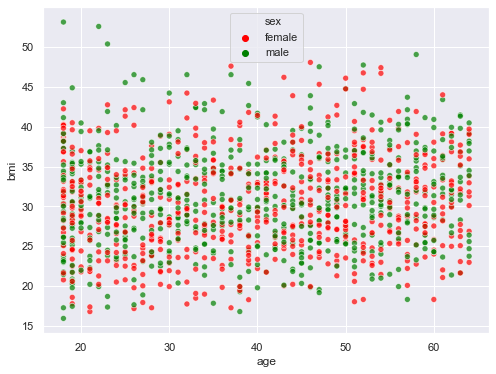

In [42]:
#Scatter plot to look for visual evidence of dependency between bmi & sex

plt.figure(figsize=(8,6))
sns.scatterplot(cf.age, cf.bmi, hue=cf.sex, palette=["red","green"], alpha=0.7)
plt.show()

In [43]:
# T-test to check dependency of gender on charges
Ho= "Male & Female have same charges" #Stating the Null Hypothesis
Ha= "Male & Female do not have same charges" #Stating the Alternate Hypothesis

x= np.array(cf[cf.sex =="male"].charges) #Selecting charges of male as an array
y= np.array(cf[cf.sex =="female"].charges) #Selecting charges of female as an array

t, p_value = stats.ttest_ind(x,y, axis =0) #performing the independent t-test

if p_value <0.05: #setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Male & Female do not have same charges as the p_value (0.03613272100592976) < 0.05


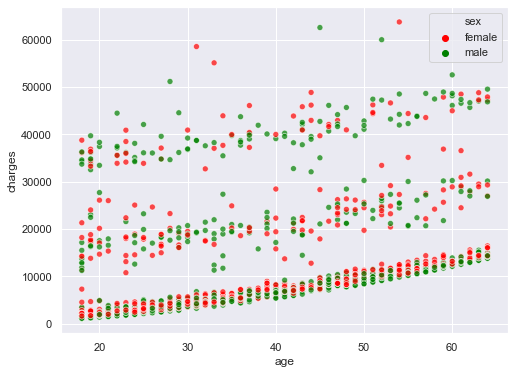

In [44]:
#Scatter plot to look for visual evidence of dependency between charges & sex

plt.figure(figsize=(8,6))
sns.scatterplot(cf.age, cf.charges, hue=cf.sex, palette=["red","green"], alpha=0.7)
plt.show()

Male & Female have to pay different charges Charges varies with gender

In [45]:
## one numerical & One category---- T Test

In [46]:
## two categorical data---- chi square Test

In [67]:
#chi-square test to check if smoking habits are different for different genders

Ho= "Gender has no effect on smoking habits" #Stating the Null Hypothesis
Ha= "Gender has an effect on smoking habits" #Stating the Alternate Hypothesis

crosstab = pd.crosstab(cf['sex'] ,cf['smoker'])  #contingency table of sex and smoker attributes
chi, p_value, dof , expected = stats.chi2_contingency(crosstab)

if p_value <0.05: #setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [74]:
#chi-square test to check if smoking habits are different for different genders

Ho= "Region has no effect on charges" #Stating the Null Hypothesis
Ha= "Region has an effect on charges" #Stating the Alternate Hypothesis

crosstab = pd.crosstab(cf['charges'] ,cf['region'])  #contingency table of sex and smoker attributes
chi, p_value, dof , expected = stats.chi2_contingency(crosstab)

if p_value <0.05: #setting our significance level at 5%
    print(f'{Ha} as the p_value ({round(p_value*100,2)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({round(p_value*100,2)}) > 0.05')
crosstab

Region has no effect on charges as the p_value (47.03) > 0.05


region,northeast,northwest,southeast,southwest
charges,,,,
1121.87390,0,0,1,0
1131.50660,0,0,1,0
1135.94070,0,0,1,0
1136.39940,0,0,1,0
1137.01100,0,0,1,0
...,...,...,...,...
55135.40209,0,1,0,0
58571.07448,1,0,0,0
60021.39897,0,1,0,0
